In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sb
sb.set()
import statsmodels.api as sm

In [209]:
raw_data = pd.read_csv('Raw_Data.csv')

In [210]:
raw_data.columns.tolist()

['governorate',
 'building_type',
 'rooms',
 'season',
 'month',
 'city',
 'temperature',
 'price_per_kwh',
 'tax_rate',
 'consumption_kwh',
 'bill_amount']

In [211]:
raw_data.sample(10)

,governorate,building_type,rooms,season,month,city,temperature,price_per_kwh,tax_rate,consumption_kwh,bill_amount
5528,Alexandria,Office,2,Winter,1.0,Sidi Gaber,15.82,0.9548,0.1410,353.15,384.73
3371,Suez,Apartment,3,Winter,2.0,Suez City,21.39,0.8553,0.1205,260.61,249.73
9191,Minya,Apartment,2,Autumn,10.0,Beni Mazar,29.48,0.7626,0.0910,193.92,161.34
3574,Asyut,Office,1,Spring,3.0,Abnoub,26.60,0.8934,0.0804,333.76,322.14
15703,Dakahlia,Apartment,2,Summer,8.0,Mit Ghamr,31.22,0.7993,0.0928,263.57,230.24
16664,Sharqia,Apartment,1,Autumn,9.0,Belbeis,24.91,0.7577,0.1278,178.75,152.74
7868,Cairo,Apartment,1,Summer,8.0,Maadi,29.68,0.8730,0.1347,170.89,169.27
25066,Suez,Office,1,Autumn,11.0,Suez City,27.79,0.9806,0.1236,362.18,399.08
2364,Suez,Apartment,3,Autumn,11.0,Suez City,32.94,0.7726,0.1123,241.35,207.41
10920,Beheira,Office,4,Winter,1.0,Kafr El Dawwar,15.62,0.9435,0.0904,539.33,554.82


In [212]:
raw_data.describe(include='all')          # general stats for all columns

,governorate,building_type,rooms,season,month,city,temperature,price_per_kwh,tax_rate,consumption_kwh,bill_amount
count,30000,29572,30000.000000,29750,29900.000000,29850,29970.000000,29980.000000,30000.000000,29940.000000,30000.000000
unique,10,3,NaN,4,NaN,37,NaN,NaN,NaN,NaN,NaN
top,Giza,Apartment,NaN,Summer,NaN,Kafr El Dawwar,NaN,NaN,NaN,NaN,NaN
freq,3046,20782,NaN,7523,NaN,1508,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.882667,NaN,6.527090,NaN,25.703118,0.825189,0.105961,350.385337,330.904916
std,NaN,NaN,1.664670,NaN,3.464705,NaN,5.323063,0.086975,0.021733,203.191322,217.403567
min,NaN,NaN,1.000000,NaN,1.000000,NaN,9.440000,0.654800,0.058800,89.180000,78.270000
25%,NaN,NaN,2.000000,NaN,3.000000,NaN,22.020000,0.759700,0.089500,209.990000,179.577500
50%,NaN,NaN,3.000000,NaN,7.000000,NaN,25.620000,0.800900,0.106100,279.965000,242.485000
75%,NaN,NaN,4.000000,NaN,10.000000,NaN,29.500000,0.876500,0.122900,426.307500,431.385000


In [213]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   governorate      30000 non-null  object 
 1   building_type    29572 non-null  object 
 2   rooms            30000 non-null  int64  
 3   season           29750 non-null  object 
 4   month            29900 non-null  float64
 5   city             29850 non-null  object 
 6   temperature      29970 non-null  float64
 7   price_per_kwh    29980 non-null  float64
 8   tax_rate         30000 non-null  float64
 9   consumption_kwh  29940 non-null  float64
 10  bill_amount      30000 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.5+ MB


<Axes: >

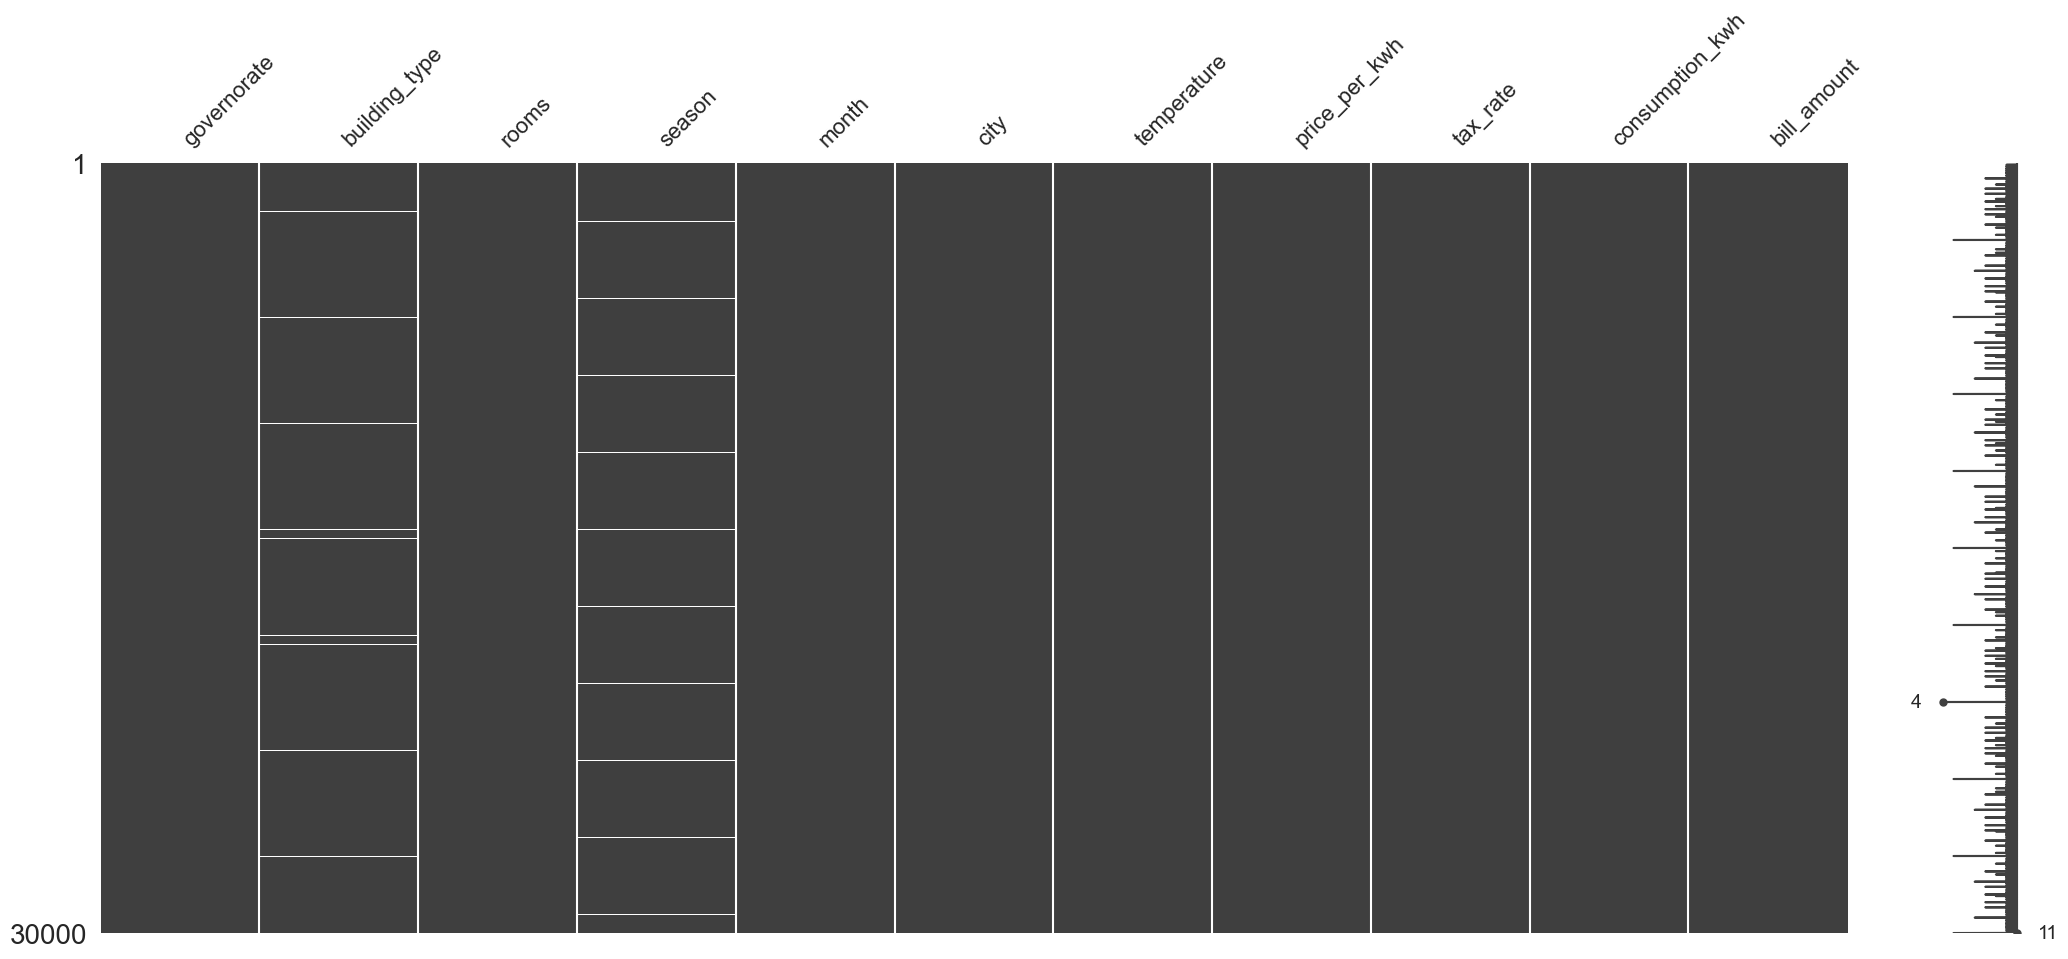

In [214]:
import missingno as mi
mi.matrix(raw_data)

In [215]:
raw_data.isnull().sum()

governorate          0
building_type      428
rooms                0
season             250
month              100
city               150
temperature         30
price_per_kwh       20
tax_rate             0
consumption_kwh     60
bill_amount          0
dtype: int64

In [216]:
for col in raw_data.columns:
    print(f"{col}: {raw_data[col].nunique()} unique values")

governorate: 10 unique values
building_type: 3 unique values
rooms: 9 unique values
season: 4 unique values
month: 12 unique values
city: 37 unique values
temperature: 2640 unique values
price_per_kwh: 3875 unique values
tax_rate: 982 unique values
consumption_kwh: 22242 unique values
bill_amount: 22023 unique values


In [217]:
# check data balance
for col in raw_data.columns:
    print(f"{col}: {raw_data[col].value_counts(normalize=True)}")


governorate: governorate
Giza          0.101533
Luxor         0.101267
Suez          0.100900
Minya         0.100800
Alexandria    0.100767
Sharqia       0.100633
Asyut         0.100200
Dakahlia      0.098533
Beheira       0.097700
Cairo         0.097667
Name: proportion, dtype: float64
building_type: building_type
Apartment    0.702759
Villa        0.149702
Office       0.147538
Name: proportion, dtype: float64
rooms: rooms
2    0.277200
3    0.236100
1    0.209600
4    0.120833
5    0.077367
6    0.035867
7    0.026100
8    0.010100
9    0.006833
Name: proportion, dtype: float64
season: season
Summer    0.252874
Winter    0.252773
Autumn    0.251664
Spring    0.242689
Name: proportion, dtype: float64
month: month
11.0    0.085886
8.0     0.085184
6.0     0.084883
12.0    0.084749
2.0     0.084314
1.0     0.083512
3.0     0.083411
9.0     0.082977
10.0    0.082910
7.0     0.082676
4.0     0.079900
5.0     0.079599
Name: proportion, dtype: float64
city: city
Kafr El Dawwar     0.050519

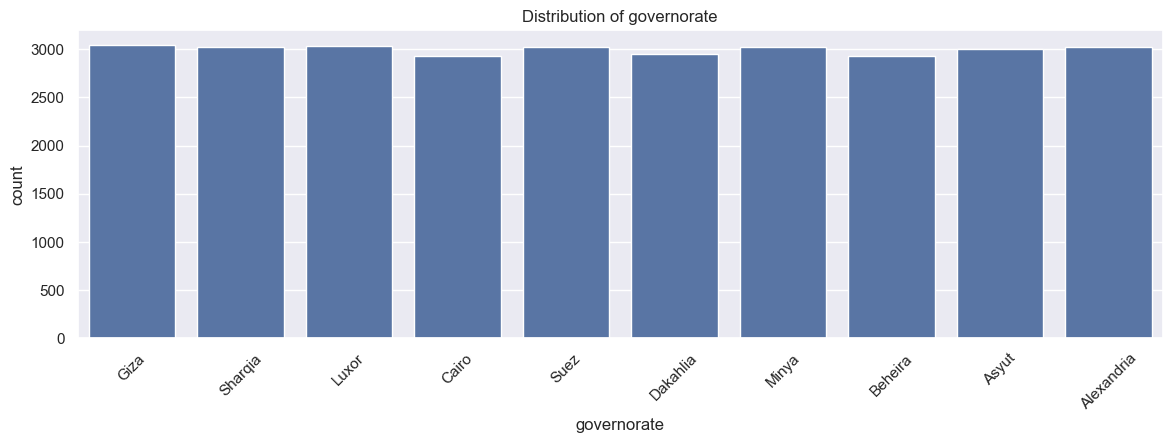

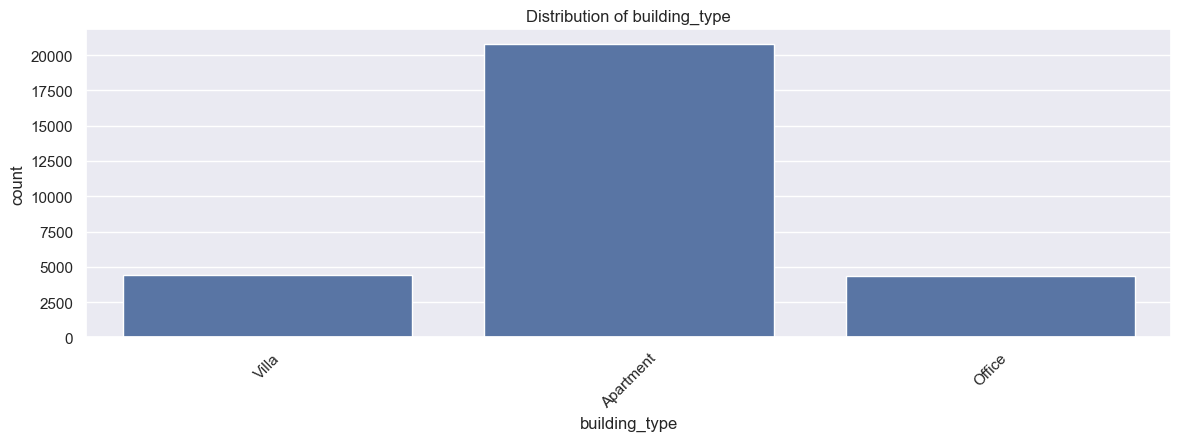

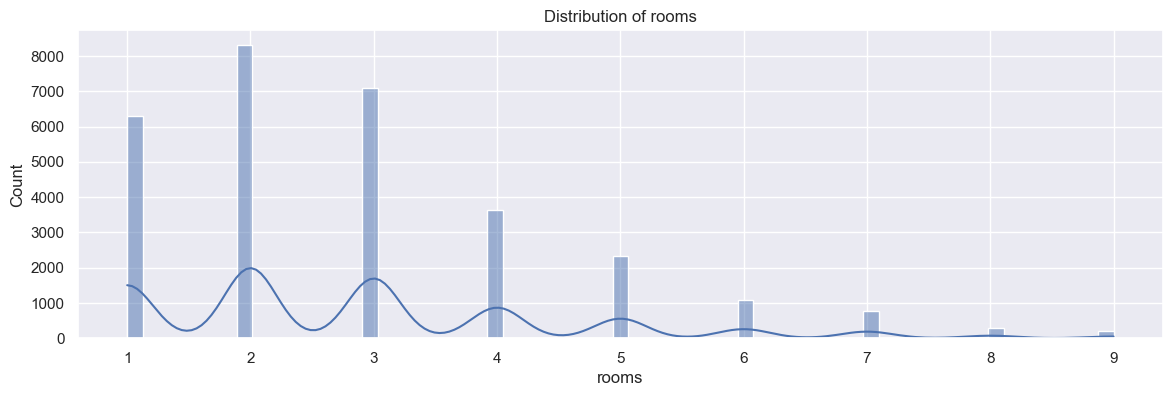

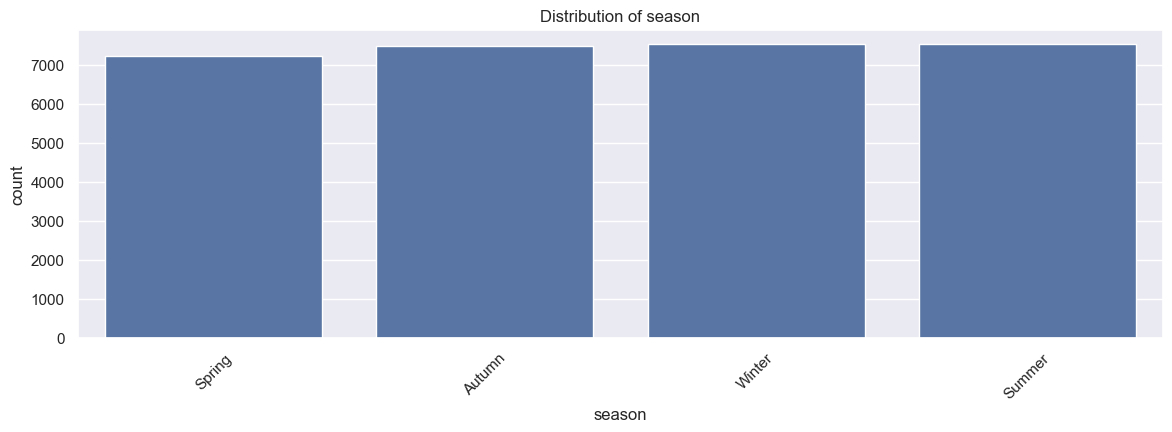

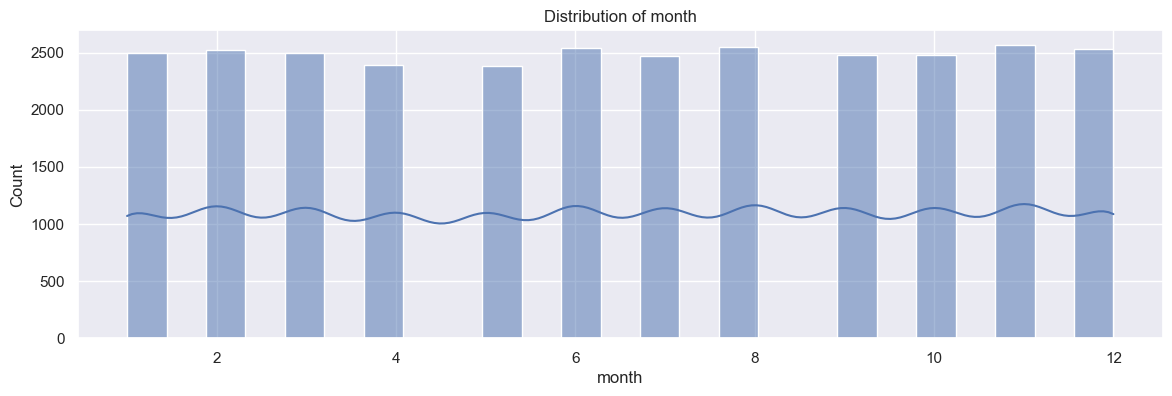

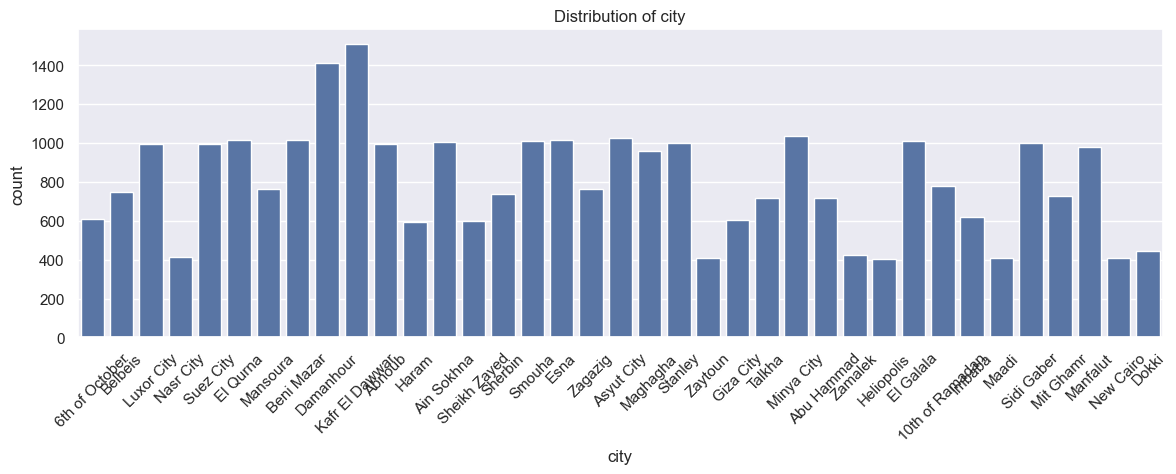

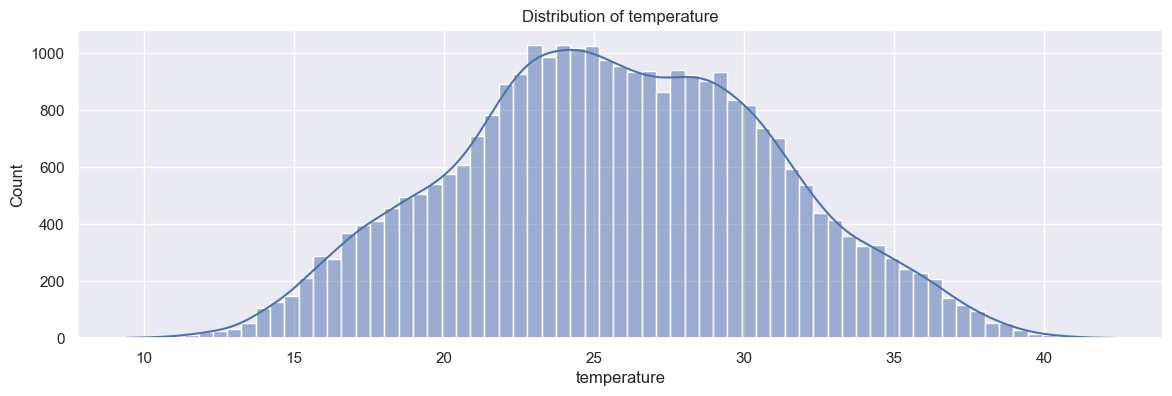

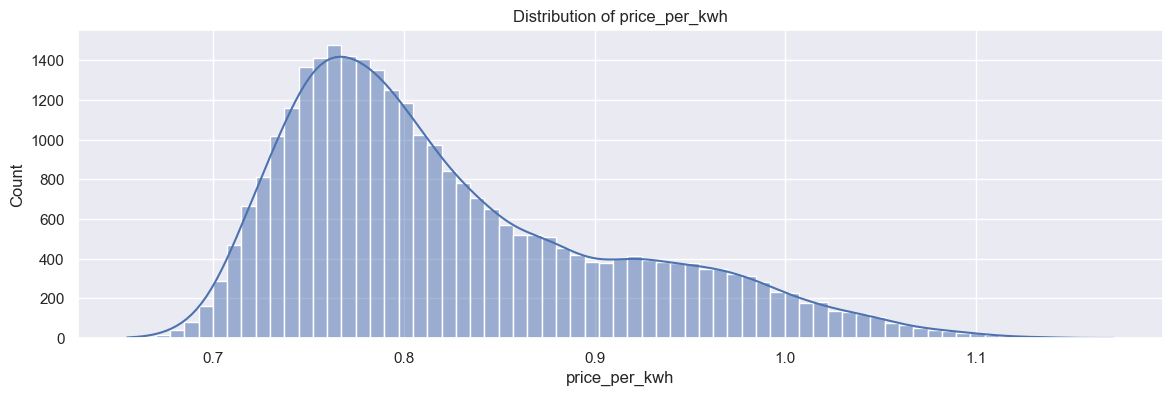

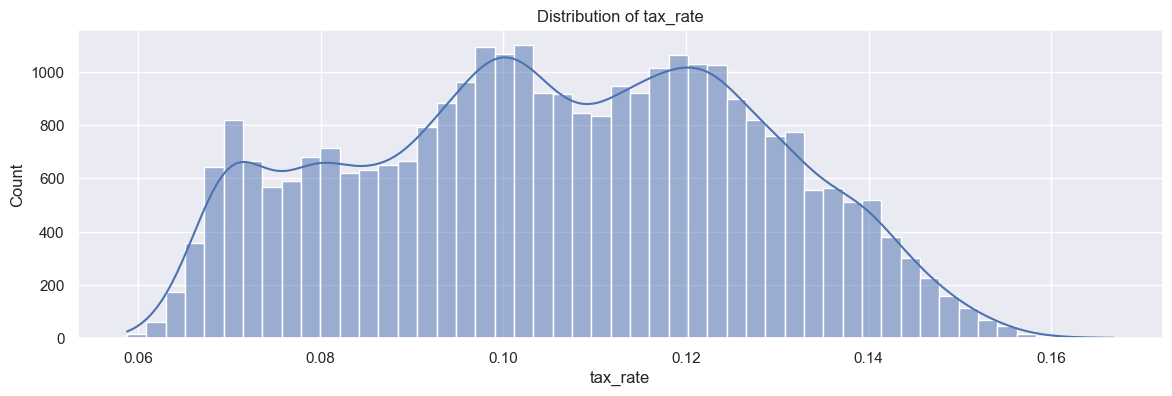

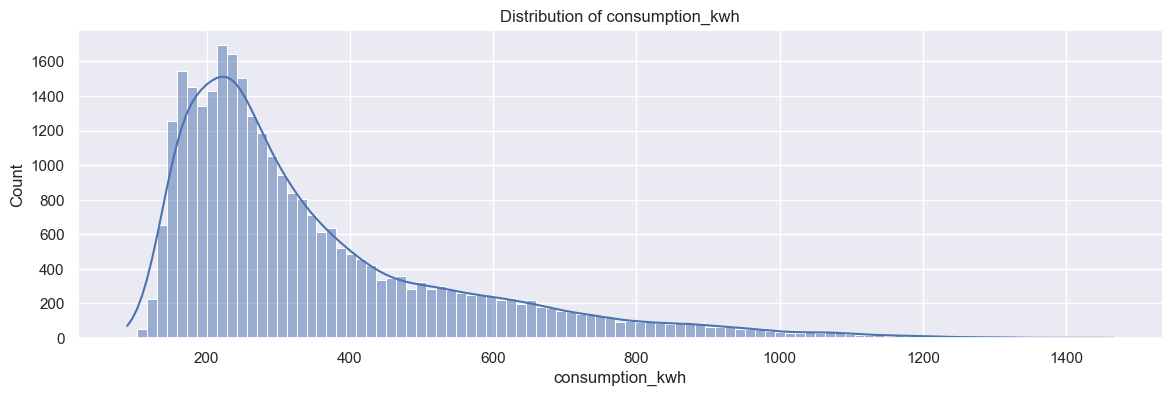

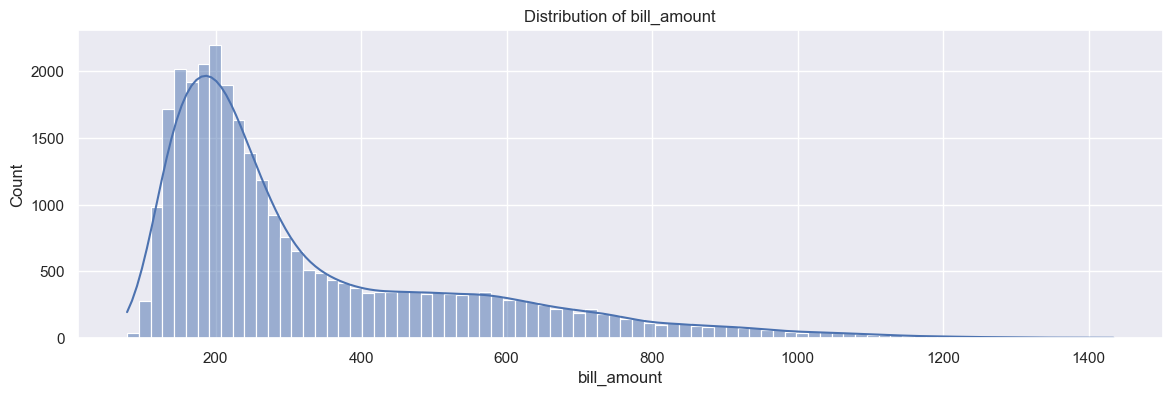

In [220]:
# Visualize data balance for categorical columns
categorical_cols = raw_data.select_dtypes(include=['object', 'category']).columns
for col in raw_data:
    if col not in categorical_cols:
        plt.figure(figsize=(14, 4))
        sb.histplot(data=raw_data, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        plt.figure(figsize=(14, 4))
        sb.countplot(data=raw_data, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()